In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from networks.autoencoder import AutoEncoder
from networks.composedautoencoder import ComposedAutoEncoder
from dataset import NumpyCsvDataSet

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import matplotlib.pyplot as plt
import time
import os
from io import StringIO

In [3]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [4]:
data_folder = 'data/demoplanner/version1'
train_data = NumpyCsvDataSet(data_folder + '/train.csv')
test_data = NumpyCsvDataSet(data_folder + '/test.csv')
train_data = train_data.data/255.
test_data = test_data.data/255.

training_loader = DataLoader(train_data, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data, batch_size=3, shuffle=True)

In [5]:
print (train_data.data.shape)
print (test_data.data.shape)

torch.Size([13280, 2058])
torch.Size([1341, 2058])


In [6]:
x_dim = 2
img_res = 32
img_size = img_res * img_res

In [7]:
%reset -f AutoEncoder
%reset -f ComposedAutoEncoder
%reset -f net

Don't know how to reset  autoencoder, please run `%reset?` for details
Don't know how to reset  composedautoencoder, please run `%reset?` for details
Don't know how to reset  net, please run `%reset?` for details


In [8]:
class autoencoder(torch.torch.nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1), #bias=False
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
            torch.nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(True),
            torch.nn.MaxPool2d(2, stride=2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(16, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(16, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
net = autoencoder()

print(net)

for name, param in net.named_parameters():
    if param.requires_grad:
        print(name, len(param.data))


autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1

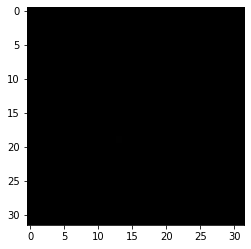

---------------------------------------
Iteration 0
MAE on train set 0.016775276511907578
MAE on test set 0.01760169118642807


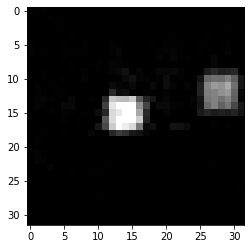

---------------------------------------
Iteration 500
MAE on train set 0.0017204174073413014
MAE on test set 0.0017898636870086193


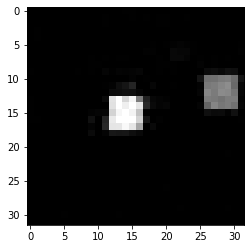

---------------------------------------
Iteration 1000
MAE on train set 0.0009520671446807683
MAE on test set 0.0010196598013862967


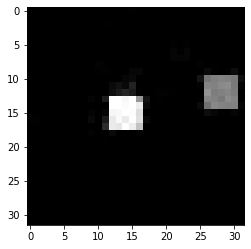

---------------------------------------
Iteration 1500
MAE on train set 0.0007222552667371929
MAE on test set 0.0007798121660016477


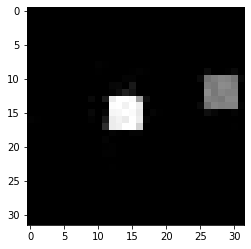

---------------------------------------
Iteration 2000
MAE on train set 0.0006130633410066366
MAE on test set 0.0006699057412333786


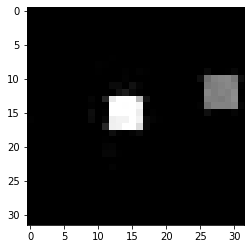

---------------------------------------
Iteration 2500
MAE on train set 0.0005484446883201599
MAE on test set 0.0005922876880504191


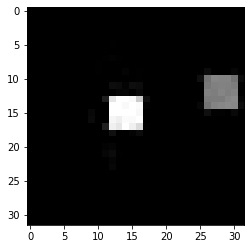

---------------------------------------
Iteration 3000
MAE on train set 0.000507374934386462
MAE on test set 0.0005476718652062118


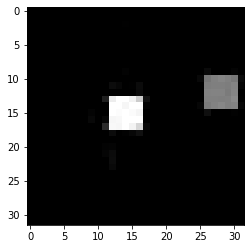

---------------------------------------
Iteration 3500
MAE on train set 0.0004713952075690031
MAE on test set 0.0005120624555274844


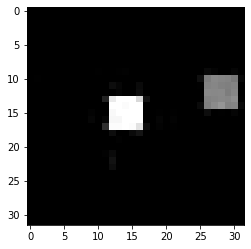

---------------------------------------
Iteration 4000
MAE on train set 0.00044925831025466323
MAE on test set 0.0004891789867542684


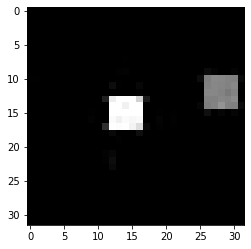

---------------------------------------
Iteration 4500
MAE on train set 0.00042385037522763014
MAE on test set 0.0004613932396750897


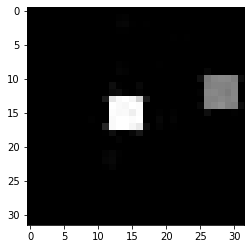

---------------------------------------
Iteration 5000
MAE on train set 0.00040433654794469476
MAE on test set 0.00044362706830725074


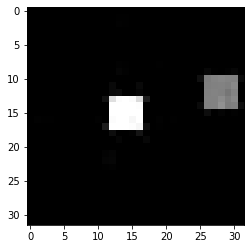

---------------------------------------
Iteration 5500
MAE on train set 0.00039500652928836644
MAE on test set 0.0004376634315121919


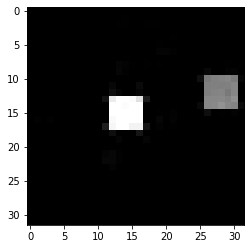

---------------------------------------
Iteration 6000
MAE on train set 0.0003756241931114346
MAE on test set 0.0004173277993686497


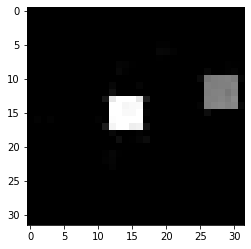

---------------------------------------
Iteration 6500
MAE on train set 0.0003661509254015982
MAE on test set 0.00041021688957698643


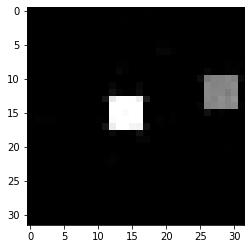

---------------------------------------
Iteration 7000
MAE on train set 0.0003544935316313058
MAE on test set 0.00039828295120969415


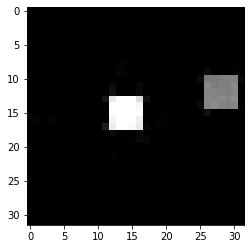

---------------------------------------
Iteration 7500
MAE on train set 0.00034140111529268324
MAE on test set 0.00038317902362905443


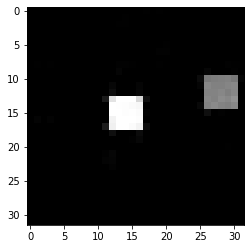

---------------------------------------
Iteration 8000
MAE on train set 0.00033320681541226804
MAE on test set 0.00037754399818368256


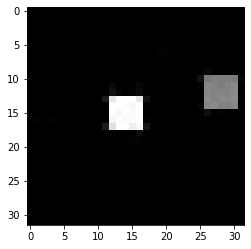

---------------------------------------
Iteration 8500
MAE on train set 0.0003244237741455436
MAE on test set 0.0003696591593325138


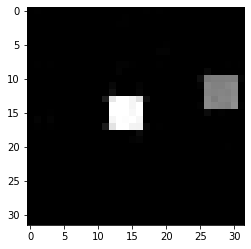

---------------------------------------
Iteration 9000
MAE on train set 0.000315614219289273
MAE on test set 0.00036057006218470633


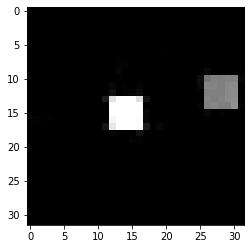

---------------------------------------
Iteration 9500
MAE on train set 0.0003133601858280599
MAE on test set 0.0003595991001930088


In [9]:
num_iterations = 10000
batch_size = 200
eval_freq = 500

criterion = torch.nn.SmoothL1Loss()
optimizer = torch.optim.Adam(net.parameters())
for i in range(num_iterations):
    net.zero_grad()
    optimizer.zero_grad()

    ind = np.random.randint(0, train_data.data.shape[0], size=batch_size)
    input = torch.FloatTensor(train_data.data[ind, 2:1026])
    input = torch.reshape(input, [-1, 1, 32, 32])
    output = net(input)

    loss = criterion(input=output, target=input)
    loss.backward()
    optimizer.step()

    if i % eval_freq == 0:
        input = torch.FloatTensor(train_data.data[:, 2:1026])
        input = torch.reshape(input, [-1, 1, 32, 32])
        output = net(input)
        # train_mae = torch.mean(torch.abs(input-output), dim=0)
        train_error = criterion(input=output, target=input)

        input = torch.FloatTensor(test_data.data[:, 2:1026])
        input = torch.reshape(input, [-1, 1, 32, 32])
        output = net(input)
        test_error = criterion(input=output, target=input)

        plt.imshow(output.data[0, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
        plt.show()

        print("---------------------------------------")
        print(f"Iteration {i}")
        # print(f"MAE on train set {train_mae}")
        print(f"MAE on train set {train_error}")
        # print(f"MAE on test set {test_mae}")
        print(f"MAE on test set {test_error}")

datapoint 0 test error tensor(0.0001)


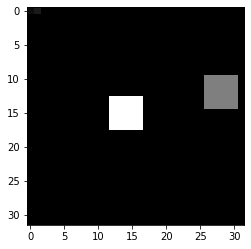

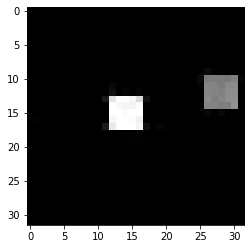

datapoint 1 test error tensor(9.6265e-05)


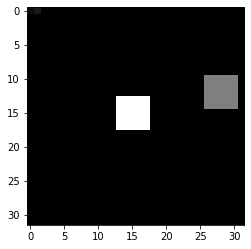

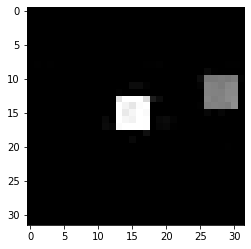

datapoint 2 test error tensor(8.6319e-05)


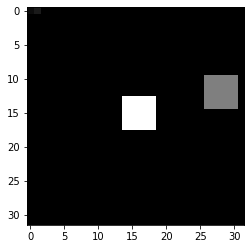

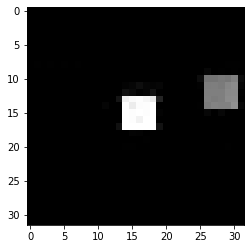

datapoint 3 test error tensor(9.7029e-05)


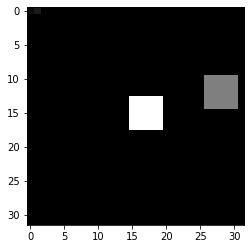

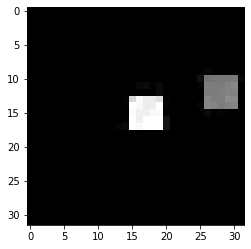

datapoint 4 test error tensor(0.0002)


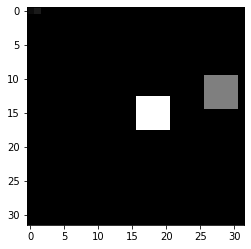

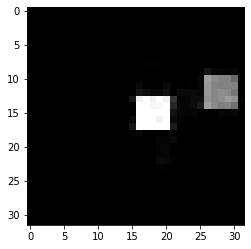

In [10]:
input = torch.FloatTensor(test_data.data[:, 2:1026])
input = torch.reshape(input, [-1, 1, 32, 32])
output = net(input)
for i in range(5):
    print('datapoint', str(i), 'test error', criterion(input=input.data[i, 0, :, :], target=output.data[i, 0, :, :]))
    plt.imshow(input.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()
    plt.imshow(output.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()

datapoint 0 train error tensor(0.0005)


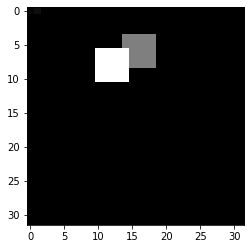

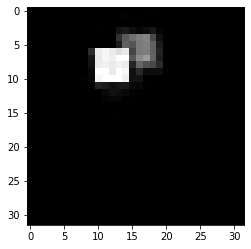

datapoint 1 train error tensor(0.0004)


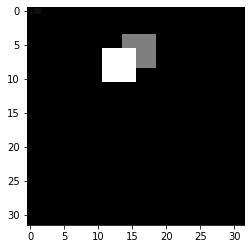

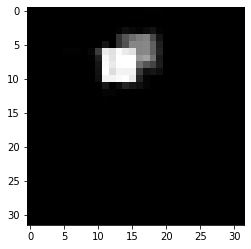

datapoint 2 train error tensor(0.0006)


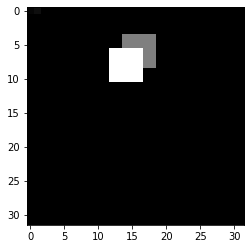

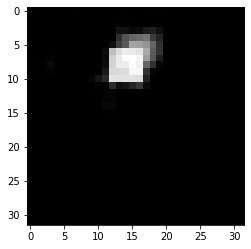

datapoint 3 train error tensor(0.0003)


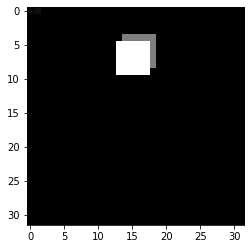

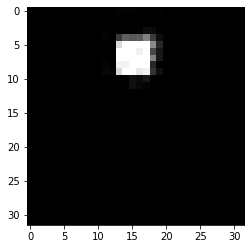

datapoint 4 train error tensor(0.0002)


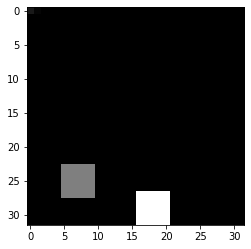

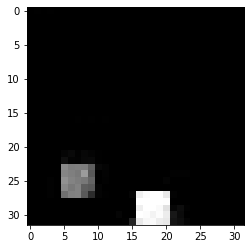

In [11]:
input = torch.FloatTensor(train_data.data[:, 2:1026])
input = torch.reshape(input, [-1, 1, 32, 32])
output = net(input)
for i in range(5):
    print('datapoint', str(i), 'train error', criterion(input=input.data[i, 0, :, :], target=output.data[i, 0, :, :]))
    plt.imshow(input.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()
    plt.imshow(output.data[i, 0, :, :], cmap=plt.get_cmap("gray"), vmin=0, vmax=1)
    plt.show()